<p style="text-align:center">
    <a href="https://nbviewer.jupyter.org/github/twMr7/Python-Machine-Learning/blob/master/QuickStart/Python_Machine_Learning_Quick_Tour.ipynb">
        Open In Jupyter nbviewer
        <img style="float: center;" src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" width="120" />
    </a>
</p>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twMr7/Python-Machine-Learning/blob/master/QuickStart/Python_Machine_Learning_Quick_Tour.ipynb)

# Python Machine Learning Quick Tour


這份快速導覽主要介紹：
- 機器學習有哪些任務？
- 使用那些適當的 Python 工具完成任務？

順利執行這個筆記本的必要的套件如下：

| 工具函式庫套件      | 網址                                                                     |
|---------------------|--------------------------------------------------------------------------|
| **`numpy`**         | [numpy.org](https://numpy.org/doc/stable/)                               |
| **`scipy`**         | [scipy.org](https://docs.scipy.org/doc/scipy/reference/)                 |
| **`matplotlib`**    | [matplotlib.org](https://matplotlib.org/stable/users/index.html)         |
| **`seaborn`**       | [seaborn.pydata.org](https://seaborn.pydata.org/api.html)                |
| **`pandas`**        | [pandas.pydata.org](https://pandas.pydata.org/docs/)                     |
| **`scikit-learn`**  | [scikit-learn.org](https://scikit-learn.org/stable/modules/classes.html) |

In [ ]:
"""
如果你已經裝好必要的Python套件環境的話，這份notebook可以在自己的電腦上執行。不然，可以使用Google的Colab。

若在Colab上開啟，請執行以下步驟：
1. 按右上角的【連線】，啟動雲端的Linux虛擬機器環境。
2. 執行這一格的程式碼，以安裝必要的套件。
"""
# 目前所有必要的套件在Colab上都有，這一格可以不用執行
!python --version
!pip list

# 日後若發現缺了某個套件，可以用 !pip install <套件名稱> 安裝


## 二元分類 － Binary Classification



### § Breast Cancer Wisconsin 資料集

資料來源是公開的乳癌資料集 [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))，檔案是逗號分隔欄位值的格式（Comma-Separated Values, CSV），一般文字編輯器或 Excel 都可以開啟，在 Python 的程式裡可以使用 **pandas** 套件來操作。


In [1]:
# 載入 pandas 套件
import pandas as pd

# 載入 WDBC (Wisconsin Diagnostic Breast Cancer) 資料集，傳回 pandas.DataFrame 類別的物件
dfWDBC = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)


In [2]:
# 資料欄位基本檢視
dfWDBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22


### §  WDBC 資料集欄位說明

原始數據沒有包含欄位名稱，說明在另外一個檔案 "*wdbc.names*" 中。

+ 欄位1： 樣本 ID
+ 欄位2： 診斷結果，"**M**" = malignant 惡性，"**B**" = benign 良性

十個實數值的細胞核特徵由細針抽吸（fine needle aspiration cytology）的細胞病理影像樣本計算而來：
+ 半徑 **radius** (mean of distances from center to points on the perimeter)
+ 紋理 **texture** (standard deviation of gray-scale values)
+ 周長 **perimeter**
+ 面積 **area**
+ 形狀平滑度 **smoothness** (local variation in radius lengths)
+ 緊密度 **compactness** (perimeter^2 / area - 1.0)
+ 輪廓凹陷度 **concavity** (severity of concave portions of the contour)
+ 輪廓凹陷點 **concave points** (number of concave portions of the contour)
+ 對稱性 **symmetry**
+ 碎形維度 **fractal dimension** ("coastline approximation" - 1)

每個影像的這十個特徵都分別計算 mean，standard error，以及 worst（三個最大值的平均），共 30 個特徵欄位。

![細針穿刺抽吸細胞學影像](https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Adenoid_cystic_carcinoma_cytology.jpg/640px-Adenoid_cystic_carcinoma_cytology.jpg)

<caption><center> 細針穿刺抽吸細胞學影像 (<a href="https://commons.wikimedia.org/wiki/File:Adenoid_cystic_carcinoma_cytology.jpg">影像來源</a>) </center></caption><br>



#### ★ 觀念 ★

 當然可以使用 Excel 來手動為原始數據檔案加上欄位名稱，或是訓練預測模型之前的前處理，但是所有的操作必須遵循以下原則：

1. 保留原始檔案，修改的內容另存新檔。
2. 記錄所有修改步驟及歷程，說明的內容要可以從原始檔案重現修改的結果。

要符合這樣的原則，使用 Python 程式進行處理還是首選。


In [3]:
# 說明中描述的欄位名稱
column_mean = [
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"
]
column_se = [
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se"
]
column_worst = [
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"
]

column_names = ["id", "diagnosis"] + column_mean + column_se + column_worst

# 指定欄位名稱
dfWDBC.columns = column_names

# 再一次資料欄位基本檢視
dfWDBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


### § 觀察數據內容

一般而言，機器學習關心的是要如何從已知的資料中，建構一個可以用來預測未知資料特性的模型。 執行學習的任務使用電腦系統的演算法來***自動發現數據的規律性***，稱為模式識別（Pattern Recognition）。 所以機器學習演算法的設計，所關心的是如何識別資料中隱含的模式來作推論，而不是明確指示推論的邏輯。

然而，目前機器學習的技術還沒發展到可以完全自動的程度，開始訓練模型之前還有很多的前處理工作需要人的介入，不同的模型可能需要不同的數據前處理，所以首先要先觀察手上的資料，並盡可能了解每個欄位的意義以及跟預測目標的關聯，決定要做什麼必要的前處理：

+ 哪些是特徵欄位 X？ 哪些是目標欄位 Y？ 有沒有多餘的不要進入模型訓練的欄位？
+ 都是連續數值欄位嗎？ 有沒有類別欄位？
+ 有沒有漏失數據？ 有沒有空值要填補或插補？
+ 數值欄位的數值分布狀況？ 要怎麼正規化？
+ 目標類別分布狀況如何？ 數量是否平均？
+ 特徵與目標之間是否有線性或其他形式的相關？
+ 各特徵之間是否有線性或其他形式的相關？ 


In [4]:
# 看一下前面幾筆，檢視資料內容
dfWDBC.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# 丟掉不需要的 "id" 欄位
dfWDBC.drop(columns=['id'], inplace=True)

In [5]:
# 觀察目標類別數量分布狀況
print('\n-- 不同樣本值的出現次數：\n', dfWDBC.loc[:, ['diagnosis']].value_counts())
print('\n-- 所有不是N/A的樣本數：\n', dfWDBC.loc[:, ['diagnosis']].count())

# 也可以用序號存取 diagnosis 欄位
print('\n-- 不同樣本值的出現次數：\n', dfWDBC.iloc[:, 1].value_counts())
print('\n-- 所有不是N/A的樣本數：\n', dfWDBC.iloc[:, 1].count())

# 觀察： 惡性的類別比較少
print('\n-- 良性與惡性的樣本數比例：\n', dfWDBC.loc[:,'diagnosis'].value_counts() / dfWDBC.loc[:,'diagnosis'].count())


-- 不同樣本值的出現次數：
 diagnosis
B            357
M            212
dtype: int64

-- 所有不是N/A的樣本數：
 diagnosis    569
dtype: int64

-- 不同樣本值的出現次數：
 B    357
M    212
Name: diagnosis, dtype: int64

-- 所有不是N/A的樣本數：
 569

-- 良性與惡性的樣本數比例：
 B    0.627417
M    0.372583
Name: diagnosis, dtype: float64



#### ★ 觀念 ★

資料集中時常會包含類別數據（Categorical Data），如 WDBC 資料集中＂**diagnosis**＂欄位值是"B"或"M"的字元，機器學習的演算法處理的都是數值，需要將類別數據轉成數值型態。


In [8]:
# 將 diagnosis 欄位良性與惡性的類別轉為 0 與 1
dfWDBC.loc[:,'diagnosis'] = dfWDBC.loc[:,'diagnosis'].map({'B':0, 'M':1})

# 檢視幾筆確認轉換結果沒問題
dfWDBC.iloc[-5:, :8]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000


In [6]:
# 各數值欄位的基本統計分布狀況
display(dfWDBC.loc[:,column_mean].describe())
display(dfWDBC.loc[:,column_se].describe())
display(dfWDBC.loc[:,column_worst].describe())

# 觀察： 數據 scale 差異大

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



#### ★ 觀念 ★

數據的尺度差異大，直覺是尺度大的數字變化比較大，對決策的判斷會影響比較大，而實際上有很多機器學習的模型真的會受尺度大小的影響。 大多數的資料集都有尺度差異的現象，所以開始訓練預測模型之前，時常會先對數據進行**正規化（Normalization）**，指的就是將數據調整到相同的尺度。



### § Logistic Regression

Logistic Regression 是線性的分類模型（不是回歸），預測結果的可能性是擬合 **logistic (sigmoid)** 函數的模型。

$$
    logistic(x) = \frac{1}{1 + e^{-x}}
$$

![logistic function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)



#### ★ 觀念 ★

機器學習的手法是使用資料集 $X$ 來調整匹配模型的參數，在**監督式學習**裡，每筆 $X$ 資料都有已知的對應類別 $Y$，所執行的學習演算法可以表示為 $\hat{Y} = f(X)$，最後的 $f(X)$ 函數模型是透過 **訓練（training）** 的過程來決定，也稱為 **學習（learning）**。 

In [9]:
# 準備好 X 與 Y
Y = dfWDBC.loc[:,'diagnosis']
X = dfWDBC.drop(columns=['diagnosis'])

print('X shape = {}, Y shape = {}\n'.format(X.shape, Y.shape))

X shape = (569, 30), Y shape = (569,)



至此，只有丟掉不需要的欄位，把預測目標$Y$的類別轉為數值，$X$還沒做正規化或其他前處理。 不過有些機器學習的模型不受資料尺度差異的影響，直接先訓練看看來當作後續處理方法的評估基準，這也是常見的手法。 我們利用***Scikit-Learn***提供的工具來訓練 Logistic Regression 的模型。

+ [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [12]:
from sklearn.linear_model import LogisticRegression

# 使用預設參數建構 LogisticRegression 模型物件
lrmodel = LogisticRegression()

# 用物件的 fit() 方法來訓練模型
lrmodel.fit(X, Y)

C:\RnD\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()


有些機器學習的模型不受資料尺度差異的影響，看來 Logistic Regression 不是這樣的模型，最好還是先做一下正規化。



### § 正規化 Normalization

常用正規化類別如下：

+ [`sklearn.preprocessing.MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)： 一般通用型正規化，尺度調整至 [0, 1] 區間。
+ [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)： 又稱標準化（z-score），尺度調整至 mean 為 0 的單位標準差區間範圍。

對應的正規化函式如下：

+ [`sklearn.preprocessing.minmax_scale`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html)
+ [`sklearn.preprocessing.scale`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)


In [15]:
from sklearn.preprocessing import scale

# 重新建構新的模型物件，用正規化過的 X 再訓練一次
lrmodel = LogisticRegression().fit(scale(X), Y)

# 看看訓練的如何
print('Accuracy = {:.2f}'.format(lrmodel.score(scale(X), Y)))

Accuracy = 0.99



## 模型確效 Model Validation

模型訓練後，要有方法來度量模型的預測品質。 在上一個範例的二元分類裡，模型訓練後輸出了一個分類正確率（Accuracy）的指標，但是計算分數的輸入是原始的訓練集$X$，所以只能用來表示模型可以被訓練起來。 機器學習希望建立的是能夠預測真實世界資料（real-world data）的模型，因此訓練資料越多越好，但最終我們還是只能從有限的取樣資料中來擬合真實世界的模型，而實際進行預測的資料不會跟用來訓練的資料一模一樣，因此模型準確度的評估應該使用另外一個（不是用來訓練模型的）資料集。

機器學習裡通常的做法是把資料分成兩份，一份**訓練集（training set）**，另外一份完全不參與模型訓練的**測試集（test set）**，最後模型的準確度只使用測試集來評估。 實際在訓練過程中，我們仍然希望所有的訓練集都可以用來訓練，同時也能有效地評估訓練過程參數的改變所影響的模型的效力，因此常用的折衷方式是把訓練集拆成 k 個小段（k-fold），每次都只保留其中某一段作驗證，其餘的作訓練，全部小段都同樣輪流作一次，然後把 k 次的結果作平均。 這樣就所有的資料都有訓練過也驗證過，這種交叉驗證的手法我們稱為 **k-Fold Cross-Validation**。

![k-Fold Cross-Validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

上圖中將訓練集切割為五段，每一段包含所有訓練集的其中 20%，這樣我們稱為 5-fold。 因為沒有浪費任何資料，這樣的交叉驗證方式可以更精準的評估學習模型的效能。 缺點是 k 次的交叉驗證要花比較久的時間運算，所以如果是如百萬筆等級的大型資料集，隨機抽樣 1% 都還有個一萬筆，這樣就可以不需要 k-fold。 至於要選擇幾個 k 的 fold 則沒有一定的準則，通常還是觀察訓練集的大小來決定，若是非常小的訓練集甚至可以採取 leave-one-out（共 n 筆作 n-fold）的特殊作法。

*Scikit-learn* 將交叉驗證的工具放在 `model_selection` 模組中，常用的如下：

+ [**`sklearn.model_selection.train_test_split`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
+ [**`sklearn.model_selection.KFold`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
+ [**`sklearn.model_selection.StratifiedKFold`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
+ [**`sklearn.model_selection.cross_validate`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
+ [**`sklearn.model_selection.cross_val_score`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)


In [16]:
from sklearn.model_selection import train_test_split

# 分割成訓練集和測試集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


### § 數據洩漏

將資料集切割出訓練集和測試集以及進行k-fold交叉驗證時，必須注意避免[**數據洩漏（data leakage）**](https://en.wikipedia.org/wiki/Leakage_(machine_learning))的問題。

簡單地說，k-fold進行驗證的驗證集資料特徵，或是最後進行模型驗證的測試集資料特徵，都不能在訓練集訓練時被偷學到。 數據洩漏通常發生在資料的前處理過程，例如資料缺值的填補、或是數據的正規化等，套用這些處理時經常要先取得資料集的統計特徵（如平均值、標準差），像這樣的前處理不能在資料集分割前處理，否則結果會導致驗證時精準的假象，實際用來預測新資料時卻非常的不準。

*Scikit-learn* 提供一個 **pipeline** 的工具，可以用來簡化工作的流程：
1. 先把個別處理步驟的方法分別定義好。
2. 將負責處理每個步驟的物件，按照順序放進流程清單，學習模型物件放最後。
3. 對資料集都套用指定的（前）處理，而且會避免數據洩漏的問題。

+ [**`sklearn.pipeline.Pipeline(steps)`**](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
    - **steps**： 是工作流程的清單，照工作順序放 (*name*, *transform*) 的 tuple 的清單，最後一個一定要是 estimator。


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# 使用已經內建交叉驗證的 Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

lrcvmodel = Pipeline(
    steps=[
        ('zscaler', StandardScaler()),
        ('lrcv', LogisticRegressionCV(cv=10, max_iter=300, n_jobs=-1))
    ]
)

# 直接用 pipeline 來訓練，自動套用指定的正規化前處理
lrcvmodel.fit(X_train, Y_train)

# 測試模型的準確度
print('Accuracy = {:.2f}'.format(lrcvmodel.score(X_test, Y_test)))


Accuracy = 0.99



#### ★ 觀念 ★

當需要測試許多不同超參數所訓練出來的模型時，光看正確率來評估時常是不夠的。

+ [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)


In [28]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    roc_auc_score,
    confusion_matrix
)

Y_predict = lrcvmodel.predict(X_test)

# confusion matrix
TN, FP, FN, TP = confusion_matrix(Y_test, Y_predict).ravel()
print('\n[Confusion Matrix]:\n  | TP: {} | FP: {} |\n  | FN: {} | TN: {} |'.format(TP, FP, FN, TN))

# sensitivity & specificity
sensitivity = recall_score(Y_test, Y_predict, pos_label=1)
specificity = recall_score(Y_test, Y_predict, pos_label=0)
print('\n[Testing Scores]:\n  * Sensitivity: {:.3f}\n  * Specificity: {:.3f}'.format(sensitivity, specificity))



[Confusion Matrix]:
  | TP: 42 | FP: 0 |
  | FN: 1 | TN: 71 |

[Testing Scores]:
  * Sensitivity: 0.977
  * Specificity: 1.000



## 特徵選取



### § 相關係數

統計上有幾種常用的[相關係數](https://en.wikipedia.org/wiki/Correlation_coefficient)，一般提到相關係數指的都是 [**Pearson相關係數**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) $r$。

+ Pearson相關係數度量兩個數列 x 和 y 之間的**線性相關**程度。
+ 相關係數 $r$ 的值介於 [-1, 1] 之間。
+ $r=1$ 表示完全線性匹配的正相關，y 在一條直線上隨著 x 增加而增加。
+ $r=0$ 表示x 和 y 之間沒有線性相關性。
+ $r=-1$ 表示完全線性匹配的負相關，y 在一條直線上隨著 x 增加而減少。
+ $r$ 值大小與關係強弱的對應解釋方式沒有標準，需考慮變數實際意義上的度量精度。
+ 除了觀察 $r$ 值大小，同時也應該要檢驗 "假設沒有關係" 的推論的 $p$-value 顯著性。
+ 相關係數不受變數的尺度差異影響，正規化與否相關性不改變。

*Pandas.DataFrame* 有提供 `corr()` 的方法，預設就是 *Pearson* 相關係數，可以用來在 `seaborn.heatmap`上視覺化顯示。 若需要 $p$-value 的計算結果，可以使用 `scypy.stats` 模組的 `pearsonr()` 函數。


In [29]:
# 繪圖環境設定
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

import seaborn as sns

<AxesSubplot:>

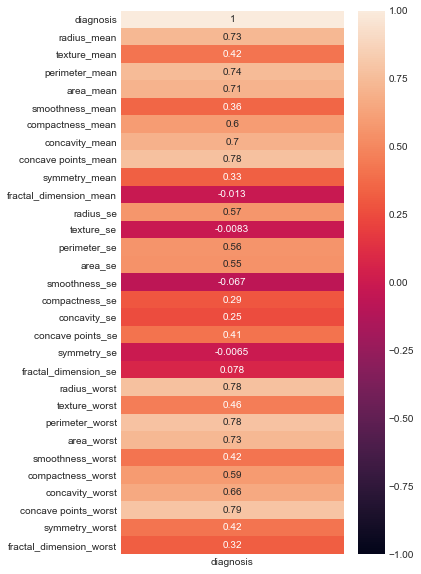

In [32]:
# 各特徵值與診斷結果相關性（corr 預設是 Pearson 的相關係數）
plt.figure(figsize=(5, 10))
sns.heatmap(dfWDBC.corr().loc[:,['diagnosis']], annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

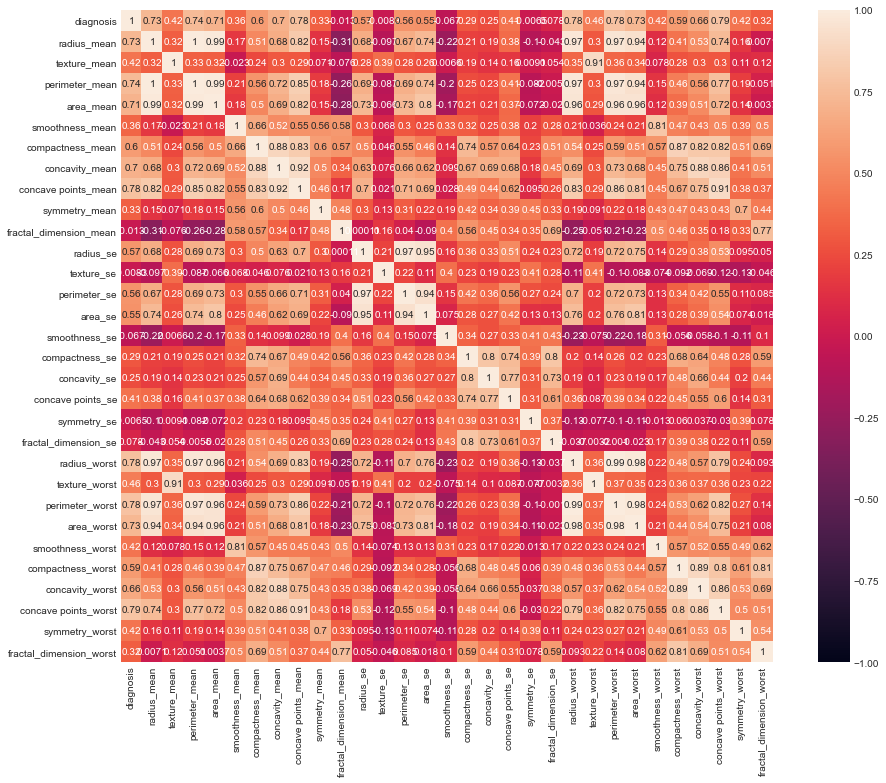

In [31]:
# 各特徵值之間的相關性（corr 預設是 Pearson 的相關係數）
plt.figure(figsize=(16, 12))
sns.heatmap(dfWDBC.corr(), annot=True, square=True, vmin=-1, vmax=1)

很多資料集的數據不是常態分佈，欄位之間也很難有線性關係。 在 WDBC 資料集中，我們很幸運地可以觀察到有些特徵值與診斷結果有線性相關，特徵與特徵兩兩之間也出現一些高度相關的。 根據相關係數觀察到的現象，可以用來篩選特徵（feature selection），以降低特徵的維度，有效的特徵篩選通常可以讓模型更容易訓練，泛化能力更好。

+ 首先丟掉與目標欄位相關性非常低的特徵（如： $-0.2 \le r \le 0.2$），保留相關性高的特徵。
+ 保留下來相關性高的特徵中，有出現兩兩高度相關的（如： $r> 0.9$），很可能去掉其中一個對模型的預測能力影響不大。



### § 其他特徵處理

沒有一種指標適用所有的資料特性，有時需要嘗試不同的指標或選取方法才能找到適合資料特性的方法。 有些方法不是透過指標選取，而是將特徵轉換或映射到不同的維度空間。

+ [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)
+ [`dimensionality reduction`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)
